<a href="https://colab.research.google.com/github/Kunal719/helper_functions/blob/main/helper_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Helper Functions

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Plot Loss Curves

Plot Loss and Accuracy graphs separately.

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate curves for training and validation metrics
  """
  loss = history.history["loss"]
  accuracy = history.history["accuracy"]
  val_loss = history.history["val_loss"]
  val_accuracy = history.history["val_accuracy"]
  
  # Number of epochs
  epochs = range(len(history.history["loss"]))

  # Plot the loss
  plt.plot(epochs,loss,label="Training Loss")
  plt.plot(epochs,val_loss,label="Validation Loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="Training Accuracy")
  plt.plot(epochs,val_accuracy,label="Validation Accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

## Preprocess Images
Preprocesses images and reshapes into a shape which can be recognized by model to predict

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape,img_shape,color_channels)
  """
  # Read an image
  img = tf.io.read_file(filename)
  # Decode the read file into tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img,[img_shape,img_shape])
  # Rescale the image and get all values between 0 and 1
  img = img / 255.
  return img

## Predict and Plot the reshaped image

In [ ]:
def pred_and_plot(model,filename,class_names):
  """
  Imports image located in filename, predicts image class with model, and plots the image with the predicted class as the title
  """
  # Preprocess the image
  img = load_and_prep_image(filename)
  # Make prediction on the image
  pred_prob = model.predict(tf.expand_dims(img, axis=0))
  # Find the prediction class
  pred_class = class_names[int(tf.round(pred_prob)[0][0])]
  # Plot the image with the predicted class as title
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False); 

## View Random Image from a target folder

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup the target directory (view image from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0]) #random_image[0] gives value without strings
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape : {img.shape}") # Shape of an image

  return img

## Getting classnames programatically

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train") # enter your path in which train/test data is available
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creates a list of class_names from the subdirectory
class_names = class_names[1:]
class_names

array([], dtype=float64)

## Plot Decision Boundary Curve for non-linear data

In [ ]:
def plot_decision_boundary(model,X,y):
  """
  Plots the model's performance/decision boundary based on predictions on X
  """
  # Define the axis boundary via a meshgrid
  x_min,x_max = X[:,0].min(),X[:,0].max()
  y_min,y_max = X[:,1].min(),X[:,1].max()
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  
  # Creating X values (predicting on these values)
  x_in = np.c_[xx.ravel(),yy.ravel()]

  # Make predictions
  y_preds = model.predict(x_in)

  # Check if it's multiclass
  if len(y_preds[0]) > 1:
    print("Multi-Class Classification Problem")
    y_preds = np.argmax(y_preds,axis=1).reshape(xx.shape)
  else :
    print("Binary Class Classification Problem")
    y_preds = np.round(y_preds).reshape(xx.shape)

  # Plot the curve
  plt.contourf(xx,yy,y_preds,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max()); 

## Plot Confusion Matrix

Was made for multiclass classification problem

NameError: ignored

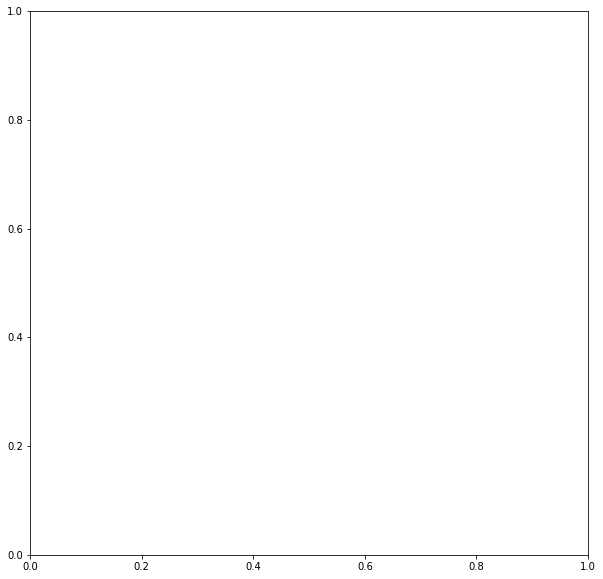

In [ ]:
# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
fig,ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({"font.size":10})

cm = confusion_matrix(test_labels,y_preds)
cmd = ConfusionMatrixDisplay(cm,[])
n_classes = cm.shape[0]
cmd.plot(cmap="Blues",ax=ax);

ax.set(title="Confusion Matrix",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=class_names,
       yticklabels=class_names)
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.title.set_size(15)

## Plot Images with true label and pred and color based on pred made

In [ ]:
# Plot a function to show images and predictions
def plot_image(i,model,true_labels,images,classes):

  #Sometimes i = random.randint(0,len(images)) and i is not defined in the function parameters
  target_image = images[i]
  pred_prob = model.predict(target_image.reshape(1,28,28))
  pred = np.argmax(pred_prob)
  pred_label = classes[pred]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image,cmap=plt.cm.binary)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  if (pred_label == true_label):
    color="green"
  else:
    color="red"
  
  plt.xlabel(f"{pred_label} ({100*tf.reduce_max(pred_prob):0.2f}%) {true_label}",color=color)

## Plot Multiple Images with graph of prediction probabilites

Was made for MultiClass Classification problems

In [ ]:
# Plotting multiple images
def plot_multiple_predictions():
  n_rows=5
  n_cols=3
  num_images=n_rows*n_cols
  plt.figure(figsize=(n_cols*2*2,n_rows*2))
  plt.title("Plot Prediction -> Left = Pred Label, Right=True Label")
  for i in range(num_images):
    plt.subplot(n_rows,2*n_cols,2*i+1)
    plot_image(i,model_1,test_labels,test_data,class_names)
    plt.subplot(n_rows,2*n_cols,2*i+2)
    plot_value_array(i,y_probs[i],test_labels)
  plt.tight_layout()
  plt.show();

## To find best Learing Rate

In [ ]:
# Add a callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20))

In [ ]:
# Find all values of learning rates
lrs = 1e-4 * (10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [ ]:
# Plotting Learning Late vs Loss
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"]) # model's history
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss");

NameError: ignored

<Figure size 720x504 with 0 Axes>

## Simple Confusion Matrix (2 labels)

NameError: ignored

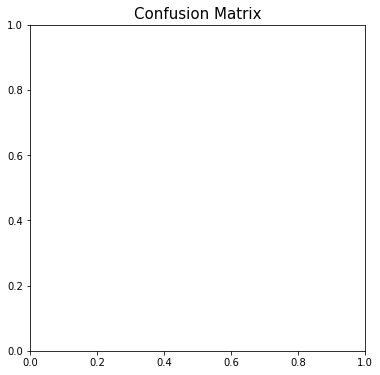

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

fig,ax = plt.subplots(figsize=(6,6))
plt.rcParams.update({'font.size': 15})

# Label ax
ax.set(title="Confusion Matrix")
ax.title.set_size(15)
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)

# Plot confusion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cmd = ConfusionMatrixDisplay(cm, [])
cmd.plot(cmap="Blues",ax=ax,)

## Plot Multiple Examples for multiclass images (Random)

NameError: ignored

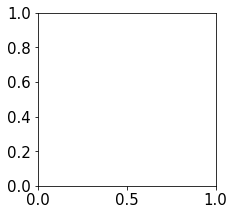

In [ ]:
# Plot multiple examples
import random
plt.figure(figsize=(7,7))
for i in range(4):
  plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_labels)))
  plt.title(class_names[train_labels[rand_index]])
  plt.imshow(train_data[rand_index])
  plt.axis(False)

## Plot predictions for a regression problem

In [ ]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_preds):
  """
  Plots training data, test data, and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  # Plot testing data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  # Plot model predictions in red
  plt.scatter(test_data,predictions,c="red",label="Predictions")
  # Make a legend
  plt.legend();

NameError: ignored

## Preprocess data, normalization/standardization in a regression dataset

In [ ]:
# Import classes from sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), # columns to be in the range of 0,1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]) # columns whose value should be either 0 or 1
)

X = insurance.drop("charges",axis=1)
y = insurance.charges

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the data to column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (standardization) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test

SyntaxError: ignored

## Make TensorBoard Callback

In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.
  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"
  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## Unzip data 

In [ ]:
import zipfile

def unzip_data(filename):
  """
  Unzips filename into the current working directory.
  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

## Walkthrough Directories

In [ ]:
import os

def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

## Calculate Results - y_true,y_preds

In [ ]:
def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array
  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

## Comparing Histories

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.
    
    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
    """
    
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

## Best Confusion Matrix (MultiClass with percentages)

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.
  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")